In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
# Load data to a DataFrame

csv_file = "../02_models/mush_data_binned.csv"
mushroom_df = pd.read_csv(csv_file)

mushroom_df.head()

,poisonous,bruises,ring_number,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_f,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
# Split data into target and features

X = mushroom_df.drop(columns="poisonous")
y = mushroom_df["poisonous"]

In [4]:
# Split into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [12]:
# Create a Decision Tree classifier
tree = DecisionTreeClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [3, 5]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best Decision Tree model from grid search
best_tree = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_tree.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Best Max Depth: {best_tree.max_depth}")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Best Max Depth: 5
Accuracy: 1.00
F1: 1.00
Precision: 1.00
Recall: 0.99


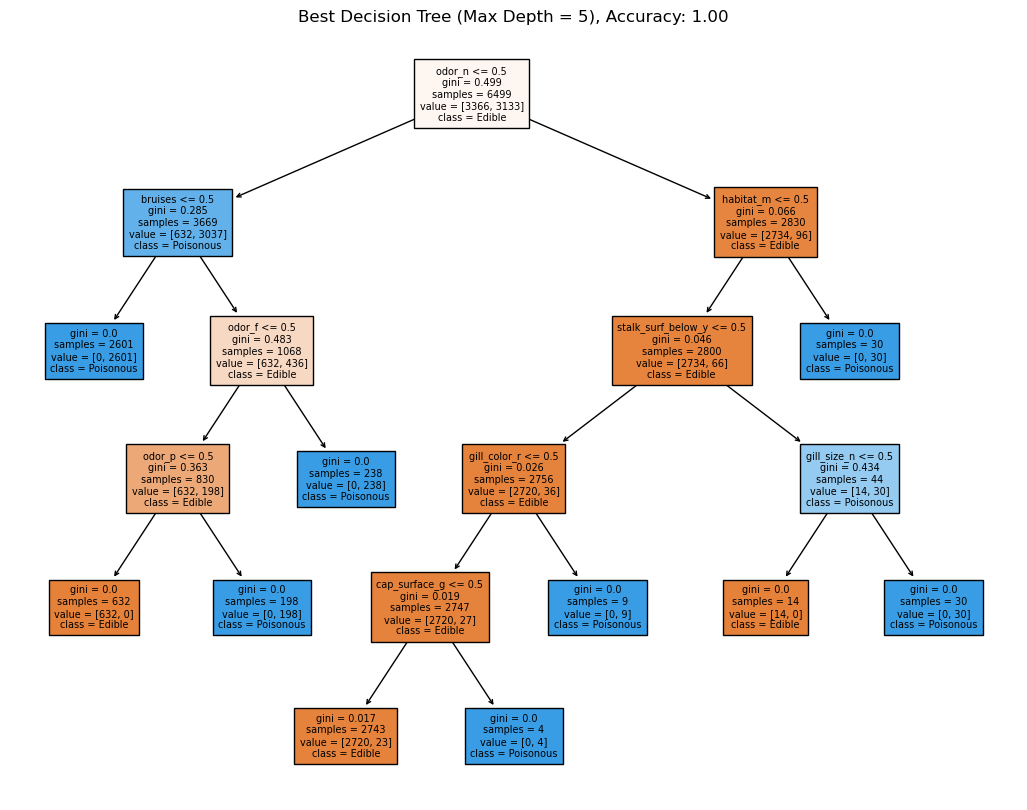

In [13]:
# Plot the decision boundary and tree
plt.figure(figsize=(13, 10), dpi=100)
plot_tree(best_tree, filled=True, feature_names=X.columns, class_names=["Edible", "Poisonous"], fontsize=7)
plt.title(f'Best Decision Tree (Max Depth = {best_tree.max_depth}), Accuracy: {accuracy:.2f}')
plt.show()

In [15]:
# Seeing how the decision tree fares when applied to the whole dataset

grid_search.fit(X, y)

# Get the best Decision Tree model from grid search
best_tree = grid_search.best_estimator_


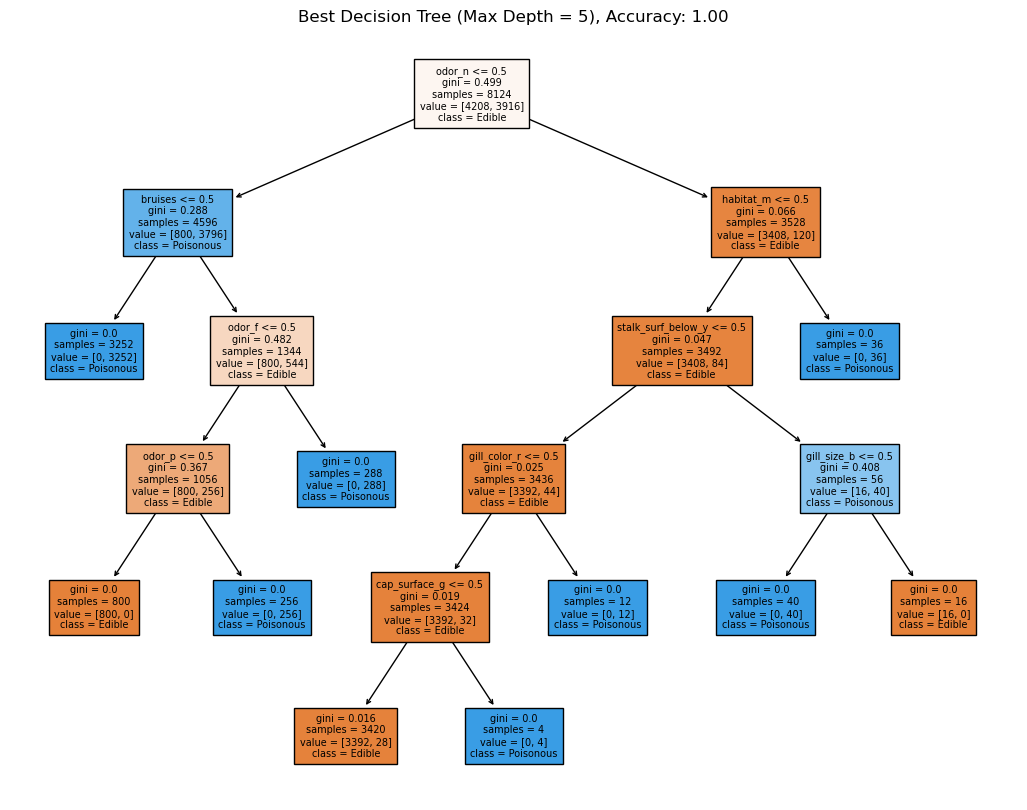

In [16]:
# Plot the decision boundary and tree
plt.figure(figsize=(13, 10), dpi=100)
plot_tree(best_tree, filled=True, feature_names=X.columns, class_names=["Edible", "Poisonous"], fontsize=7)
plt.title(f'Best Decision Tree (Max Depth = {best_tree.max_depth}), Accuracy: {accuracy:.2f}')
plt.show()

From the above graphic, we can make the following rules for hikers:
1. If a mushroom has any smell and it bruises when touched, consider it poisonous
2. If a mushroom doesn't bruise, but smells foul or pungent, consider it poisonous

These two rules taken together correctly identifies 98.87% of poisonous mushrooms.

In [32]:
feature_importances = best_tree.feature_importances_

feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.head(10)

,Feature,Importance
22,odor_n,0.629296
0,bruises,0.165720
23,odor_p,0.094237
19,odor_f,0.067032
68,habitat_m,0.017689
45,stalk_surf_below_y,0.012107
28,gill_size_n,0.005966
33,gill_color_r,0.005497
9,cap_surface_g,0.002455
48,stalk-color-above_p,0.000000


In [ ]:
# 